# Exercise
### Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Anisha Ray\Downloads\py-master\ML\7_logistic_reg\Exercise\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 1

In [2]:
left = df[df.left==1]
retained = df[df.left==0]

In [3]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Observations
1. Avg customer satisfaction level for retained = 0.666, for left = 0.440
2. Avg monthly hours for retained = 199.06, for left = 207.41
3. Avg time spent in company for retained = 3.38, for left = 3.87
4. Avg promotions in last 5 yrs for retained = 0.026, for left = 0.005

# 2

<AxesSubplot:title={'center':'impact of employee salaries on retention'}, xlabel='salary'>

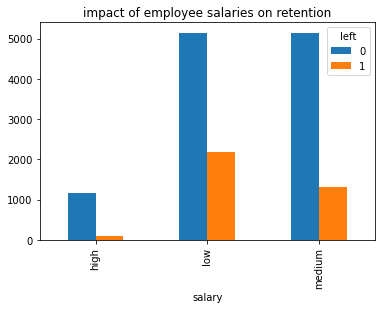

In [8]:
pd.crosstab(df.salary, df.left).plot(kind='bar', title='impact of employee salaries on retention')

# 3

<AxesSubplot:title={'center':'corelation between department and employee retention'}, xlabel='Department'>

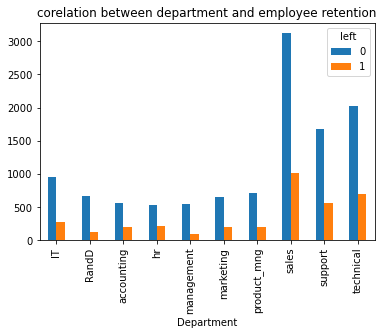

In [9]:
pd.crosstab(df.Department,df.left).plot(kind='bar',title='corelation between department and employee retention')

# 4

In [43]:
paramdf = df[['satisfaction_level','average_montly_hours','time_spend_company','promotion_last_5years','salary']]

In [44]:
salary_dummies = pd.get_dummies(paramdf.salary)

In [45]:
subdf = pd.concat([paramdf,salary_dummies],axis='columns')
subdf.drop('salary',axis='columns',inplace=True)

In [46]:
X = subdf
y = df.left

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [49]:
model.fit(X_train,y_train)

LogisticRegression()

In [51]:
model.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [52]:
y_test

13604    0
9712     0
1841     1
313      1
86       1
        ..
7478     0
3322     0
12776    1
10038    0
4192     0
Name: left, Length: 6000, dtype: int64

# 5

In [54]:
model.score(X_test, y_test)

0.7693333333333333